This analysis aims to help establish a model that quantitatively predicts CO2 emissions for new cars based on their varying properties.

The Data used can be found at; [CO2 emissions from new passenger cars](http://co2cars.apps.eea.europa.eu/?source=%7B%22track_total_hits%22%3Atrue%2C%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22constant_score%22%3A%7B%22filter%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22bool%22%3A%7B%22should%22%3A%5B%7B%22term%22%3A%7B%22year%22%3A2021%7D%7D%5D%7D%7D%2C%7B%22bool%22%3A%7B%22should%22%3A%5B%7B%22term%22%3A%7B%22scStatus%22%3A%22Provisional%22%7D%7D%5D%7D%7D%5D%7D%7D%7D%7D%5D%7D%7D%2C%22display_type%22%3A%22tabular%22%7D)


In [1]:
#This will be the workflow of this analysis

#1. Import the needed libraries
#2. Read in the data
#3. Carry out EDA to understand characteristics and distribution of variables in dataset.
#4. Future selection to select properties that influence CO2 emission such as the engine
#   size, fuel type, vehicle weight etc.
#5. Regression model selection which will involve selecting the best model for the dataset.
#6. Model training and evaluations of trained data by calculating the MSE and R-
#   squared value.
#7. Predicting new CO2 emissions with model


1. Import the needed libraries

In [2]:
#Importing all libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

2. Read in the data

In [3]:
data = pd.read_csv("/Users/user/Downloads/data.csv")
data.head()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,8,12,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,57566673,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-03-24,NaN,45.0
1,57566674,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-03-24,NaN,45.0
2,57566675,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-03-23,NaN,45.0
3,57566676,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-03-23,NaN,45.0
4,57566677,IS,IP-01-JMB-2018-0001,RENAULT-NISSAN-MITSUBISHI,MITSUBISHI MOTORS CORPORATION,MITSUBISHI MOTORS CORPORATION,NaN,E1*2001/116*0406*32,CW0,GGP21,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-03-19,NaN,45.0


3. Carry out EDA to understand characteristics and distribution of variables in dataset.


In [4]:
#will try to check the properties of the data to get an insight to it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920108 entries, 0 to 9920107
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float64
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     int64  
 16  m (kg)                float64
 17  Mt                    float64
 18  Enedc (g/km)          float64
 19  Ewltp (g/km)          float64
 20  W (mm)                float64
 21  At1 (mm)              float64
 22  At2 (mm)              float64
 23  Ft     

In [5]:
data.describe()

,ID,MMS,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Ernedc (g/km),Erwltp (g/km),De,Vf,year,Fuel consumption,Electric range (km)
count,9.920108e+06,0.0,9920108.0,9.920076e+06,7.983251e+06,2.417634e+06,9.836149e+06,9.902924e+06,8.359068e+06,8.354696e+06,8.919498e+06,9.831028e+06,1.624164e+06,0.0,4.294992e+06,0.0,0.0,9920108.0,5.879436e+06,1.464499e+06
mean,4.709523e+07,NaN,1.0,1.489677e+03,1.616466e+03,4.914571e+01,1.147725e+02,2.656181e+03,1.551759e+03,1.554185e+03,1.526805e+03,1.027808e+02,1.716764e+02,NaN,1.512520e+00,NaN,NaN,2021.0,5.464067e+00,2.069794e+02
std,1.538232e+07,NaN,0.0,3.367757e+02,3.540105e+02,5.335402e+01,5.370556e+01,1.659442e+02,6.005264e+01,6.357808e+01,5.072671e+02,5.066461e+01,3.778168e+01,NaN,5.070900e-01,NaN,NaN,0.0,1.780356e+00,1.796692e+02
min,1.000000e+00,NaN,1.0,5.900000e+02,5.060000e+02,0.000000e+00,0.000000e+00,5.010000e+02,5.570000e+02,5.570000e+02,0.000000e+00,9.000000e+00,1.000000e+00,NaN,5.000000e-01,NaN,NaN,2021.0,1.000000e-01,1.000000e+00
25%,4.665304e+07,NaN,1.0,1.250000e+03,1.365000e+03,0.000000e+00,1.110000e+02,2.570000e+03,1.520000e+03,1.517000e+03,1.197000e+03,7.200000e+01,1.500000e+02,NaN,1.100000e+00,NaN,NaN,2021.0,4.700000e+00,5.600000e+01
50%,5.166623e+07,NaN,1.0,1.433000e+03,1.556000e+03,3.400000e+01,1.260000e+02,2.647000e+03,1.558000e+03,1.560000e+03,1.497000e+03,9.500000e+01,1.630000e+02,NaN,1.600000e+00,NaN,NaN,2021.0,5.300000e+00,7.500000e+01
75%,5.487999e+07,NaN,1.0,1.674000e+03,1.805000e+03,1.040000e+02,1.420000e+02,2.729000e+03,1.586000e+03,1.588000e+03,1.950000e+03,1.120000e+02,1.800000e+02,NaN,1.900000e+00,NaN,NaN,2021.0,6.000000e+00,3.870000e+02
max,1.496950e+08,NaN,1.0,4.610000e+03,4.272000e+03,4.520000e+02,5.720000e+02,5.840000e+03,3.200000e+03,3.800000e+03,7.993000e+03,1.506000e+03,2.756000e+03,NaN,6.300000e+00,NaN,NaN,2021.0,9.900000e+01,8.080000e+02


In [7]:
#Given that the data is very large with almost 10 million row, it makes the whole processing of results very slow.
#Hence, i will reduce it to around 10000 rows for the purpose of this analysis

#reducing the dataset by randomly selecting 1% of it
new_data = data.sample(frac=0.001, random_state=42)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9920 entries, 7508241 to 415865
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9920 non-null   int64  
 1   Country               9920 non-null   object 
 2   VFN                   8905 non-null   object 
 3   Mp                    9603 non-null   object 
 4   Mh                    9920 non-null   object 
 5   Man                   9920 non-null   object 
 6   MMS                   0 non-null      float64
 7   Tan                   9896 non-null   object 
 8   T                     9915 non-null   object 
 9   Va                    9898 non-null   object 
 10  Ve                    9873 non-null   object 
 11  Mk                    9919 non-null   object 
 12  Cn                    9897 non-null   object 
 13  Ct                    9903 non-null   object 
 14  Cr                    9920 non-null   object 
 15  r            

In [8]:
#Having a quick preview on the dataset
new_data

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
7508241,55072668,FR,IP-HNS____MB6_5427-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E9*2007/46*6816*03,B,A,...,e2 28 29,NaN,2.1,NaN,NaN,P,2021,2021-04-22,5.4,NaN
9376087,46738000,IT,IP-2020_2412-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,NaN,E1*2007/46*1829*13,F2A,X21ET2,...,E1 29,NaN,1.0,NaN,NaN,P,2021,2021-02-16,4.4,NaN
7945028,45946151,IT,IP-03_BU_0246-1C4-1,STELLANTIS,CHRYSLER,FCA US LLC,NaN,E3*2007/46*0300*33,BU,AXV11,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-07-14,5.9,NaN
1463786,57304179,NL,IP-0500709-TMA-1,HYUNDAI,HYUNDAI CZECH,HYUNDAI MOTOR MANUFACTURING CZECH SRO,NaN,E5*2018/858*00001*02,NX4E,F5P41,...,e5 e5 28,NaN,0.7,NaN,NaN,P,2021,NaN,NaN,NaN
7704851,52268508,DE,IP-041309-KMH-1,HYUNDAI,HYUNDAI,HYUNDAI MOTOR COMPANY,NaN,E4*2007/46*1318*04,TM,A5P32,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-11-29,NaN,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812978,526985,ES,NaN,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E13*2007/46*1985*09,C1,DLAAACX05,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-06-21,5.8,NaN
8309827,54486592,FR,IP-JBA1AFDTL4A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,NaN,E2*2007/46*0684*07,RJB,HD2,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-01-19,NaN,NaN
6309454,51759931,DE,IP-0000608-WBA-1,BMW,BMW AG,BAYERISCHE MOTOREN WERKE AG,NaN,E1*2007/46*2126*05,G3C,61AT,...,E24 32,NaN,1.4,NaN,NaN,P,2021,2021-12-15,8.1,NaN
9744945,46506867,IT,IP-YHY____MB6_5125-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,E2*2007/46*0639*11,U,D,...,NaN,NaN,NaN,NaN,NaN,P,2021,2021-01-19,3.6,NaN


In [9]:
new_data.shape

(9920, 38)

In [10]:
#Trying to chcek all the colums available in the dataset
new_data.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [11]:
#Checking if there are missing values in the dataset 
new_data.isnull().sum()

ID                         0
Country                    0
VFN                     1015
Mp                       317
Mh                         0
Man                        0
MMS                     9920
Tan                       24
T                          5
Va                        22
Ve                        47
Mk                         1
Cn                        23
Ct                        17
Cr                         0
r                          0
m (kg)                     1
Mt                      1903
Enedc (g/km)            7480
Ewltp (g/km)              68
W (mm)                    20
At1 (mm)                1513
At2 (mm)                1519
Ft                         0
Fm                         3
ec (cm3)                 971
ep (KW)                   69
z (Wh/km)               8311
IT                      5330
Ernedc (g/km)           9920
Erwltp (g/km)           5566
De                      9920
Vf                      9920
Status                     0
year          

In [12]:
#it appears that there seem to be alot of missing values in the dataset. 
#however, to solve this, i will first remove the columns that are not needed for the analysis, leaving 
#only needed columns. hence, the needed features will now be worked on.

#below are the needed columns needed for the analysis
relevant_data = new_data[['Mk', 'm (kg)', 'Ft', 'ec (cm3)', 'ep (KW)', 'Ewltp (g/km)', 'Fuel consumption ']]
relevant_data.head()

,Mk,m (kg),Ft,ec (cm3),ep (KW),Ewltp (g/km),Fuel consumption
7508241,CITROEN,1322.0,PETROL,1199.0,96.0,122.0,5.4
9376087,MERCEDES-BENZ,1520.0,DIESEL,1950.0,140.0,133.0,4.4
7945028,JEEP,1395.0,PETROL,1332.0,110.0,150.0,5.9
1463786,HYUNDAI,1639.0,PETROL,1598.0,132.0,127.0,NaN
7704851,HYUNDAI,2040.0,PETROL/ELECTRIC,1598.0,132.0,37.0,NaN


In [13]:
#time to inspect the remaining data 
relevant_data.isnull().sum()

Mk                      1
m (kg)                  1
Ft                      0
ec (cm3)              971
ep (KW)                69
Ewltp (g/km)           68
Fuel consumption     4003
dtype: int64

In [14]:
#with fuel consumption having more than half of its values missing, the column will be droped as it could affect the overall outcome of the analysis
relevant_data = relevant_data.drop('Fuel consumption ', axis= 1)
relevant_data.head()

,Mk,m (kg),Ft,ec (cm3),ep (KW),Ewltp (g/km)
7508241,CITROEN,1322.0,PETROL,1199.0,96.0,122.0
9376087,MERCEDES-BENZ,1520.0,DIESEL,1950.0,140.0,133.0
7945028,JEEP,1395.0,PETROL,1332.0,110.0,150.0
1463786,HYUNDAI,1639.0,PETROL,1598.0,132.0,127.0
7704851,HYUNDAI,2040.0,PETROL/ELECTRIC,1598.0,132.0,37.0


In [15]:
relevant_data.isnull().sum()

Mk                1
m (kg)            1
Ft                0
ec (cm3)        971
ep (KW)          69
Ewltp (g/km)     68
dtype: int64

In [16]:
#for easy readability, i will rename all the other columns
relevant_data.rename(columns ={'Mk' : "make", 'm (kg)': "mass", 'Ft': "fuel_type", 
                               'ec (cm3)': "engine_capacity", 'ep (KW)': "engine_power",
                               'Ewltp (g/km)': "co2_emmision"
                              }, inplace = True)
relevant_data.head()

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
7508241,CITROEN,1322.0,PETROL,1199.0,96.0,122.0
9376087,MERCEDES-BENZ,1520.0,DIESEL,1950.0,140.0,133.0
7945028,JEEP,1395.0,PETROL,1332.0,110.0,150.0
1463786,HYUNDAI,1639.0,PETROL,1598.0,132.0,127.0
7704851,HYUNDAI,2040.0,PETROL/ELECTRIC,1598.0,132.0,37.0


In [17]:
relevant_data.isnull().sum()

make                 1
mass                 1
fuel_type            0
engine_capacity    971
engine_power        69
co2_emmision        68
dtype: int64

In [18]:
#trying to understand the context when engine power has missing values
#this shows that all cars using electric fuel type have engine capacity of NaN and also Co2 emmision of 0
#the engine_capacity NaN values can be replaced with 0 since electric cars dont emmit any co2 emmision

missing_engine_capacity = relevant_data[relevant_data['engine_capacity'].isna()]
missing_engine_capacity

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
125045,BMW,2260.0,ELECTRIC,NaN,210.0,0.0
5401706,BMW,2260.0,ELECTRIC,NaN,80.0,0.0
5720965,OPEL,1598.0,ELECTRIC,NaN,57.0,0.0
5349957,FORD,2257.0,ELECTRIC,NaN,273.0,0.0
1310153,OPEL,1530.0,ELECTRIC,NaN,100.0,0.0
...,...,...,...,...,...,...
3689559,PEUGEOT,1530.0,ELECTRIC,NaN,57.0,0.0
3216438,TESLA,1919.0,ELECTRIC,NaN,366.0,0.0
8038734,MERCEDES-BENZ,2480.0,ELECTRIC,NaN,109.0,0.0
470054,NISSAN,1622.0,ELECTRIC,NaN,110.0,0.0


In [19]:
mask = (relevant_data['fuel_type'] == 'ELECTRIC') & (relevant_data['engine_capacity'].isna())
relevant_data.loc[mask, 'engine_capacity'] = 0

In [20]:
relevant_data.isnull().sum()

make                1
mass                1
fuel_type           0
engine_capacity     3
engine_power       69
co2_emmision       68
dtype: int64

In [21]:
# checking for the 3 remaining NaN after the Electric fuel types have been replaced 
missing_engine_capacity = relevant_data[relevant_data['engine_capacity'].isna()]
missing_engine_capacity

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
9838255,KIA,1837.0,UNKNOWN,NaN,NaN,99.0
828521,KIA,1837.0,UNKNOWN,NaN,NaN,99.0
5635346,OPEL,1657.0,UNKNOWN,NaN,NaN,132.0


In [22]:
#removing the remaining columns where engine_capacity is NaN since they are Unknown
relevant_data = relevant_data.dropna(subset=['engine_capacity'])
relevant_data.isnull().sum()

make                1
mass                1
fuel_type           0
engine_capacity     0
engine_power       66
co2_emmision       68
dtype: int64

In [24]:
# checking for the  NaN values for make 
missing_make = relevant_data[relevant_data['make'].isna()]
missing_make

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
6921418,NaN,2030.0,DIESEL,2000.0,209.0,192.0


In [25]:
# checking for the  NaN values for mass
missing_mass = relevant_data[relevant_data['mass'].isna()]
missing_mass

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
6607213,LADA,NaN,PETROL,1690.0,61.0,243.0


In [26]:
#This process will also be repeated for both the 1 missing values for make and mass
relevant_data = relevant_data.dropna(subset=['make', 'mass'])
relevant_data.isnull().sum()

make                0
mass                0
fuel_type           0
engine_capacity     0
engine_power       66
co2_emmision       68
dtype: int64

In [27]:
#we have engine power and co2_emmisions left
#Best way is to remove NaN values of Co2 emmisions as it cant really replace with imputions like mean, median, or mode
relevant_data = relevant_data.dropna(subset=['co2_emmision'])
relevant_data.isnull().sum()

make                0
mass                0
fuel_type           0
engine_capacity     0
engine_power       66
co2_emmision        0
dtype: int64

In [28]:
missing_engine_power = relevant_data[relevant_data['engine_power'].isna()]
missing_engine_power

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
7841971,KIA,1812.0,ELECTRIC,0.0,NaN,0.0
7630472,KIA,1610.0,ELECTRIC,0.0,NaN,0.0
3235251,HYUNDAI,1985.0,ELECTRIC,0.0,NaN,0.0
7823817,HYUNDAI,1602.0,ELECTRIC,0.0,NaN,0.0
2850196,FIAT,1055.0,PETROL/ELECTRIC,999.0,NaN,120.0
...,...,...,...,...,...,...
8947211,SUZUKI,965.0,PETROL,1197.0,NaN,106.0
7855206,KIA,1757.0,ELECTRIC,0.0,NaN,0.0
1093455,VOLKSWAGEN VW,1772.0,ELECTRIC,0.0,NaN,0.0
4723948,VOLKSWAGEN,1235.0,ELECTRIC,0.0,NaN,0.0


In [29]:
#removing the NaN values of the engine_power column
relevant_data = relevant_data.dropna(subset=['engine_power'])
relevant_data.isnull().sum()

make               0
mass               0
fuel_type          0
engine_capacity    0
engine_power       0
co2_emmision       0
dtype: int64

In [30]:
relevant_data.head()

,make,mass,fuel_type,engine_capacity,engine_power,co2_emmision
7508241,CITROEN,1322.0,PETROL,1199.0,96.0,122.0
9376087,MERCEDES-BENZ,1520.0,DIESEL,1950.0,140.0,133.0
7945028,JEEP,1395.0,PETROL,1332.0,110.0,150.0
1463786,HYUNDAI,1639.0,PETROL,1598.0,132.0,127.0
7704851,HYUNDAI,2040.0,PETROL/ELECTRIC,1598.0,132.0,37.0


In [31]:
relevant_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,9781.0,1482.641039,331.854141,915.0,1248.0,1420.0,1665.0,2785.0
engine_capacity,9781.0,1377.439526,651.264407,0.0,999.0,1461.0,1798.0,6498.0
engine_power,9781.0,102.794806,49.929223,10.0,72.0,95.0,112.0,566.0
co2_emmision,9781.0,114.897250,52.646997,0.0,111.0,126.0,141.0,486.0


4. Future selection to select properties that influence CO2 emission such as the engine
  size, fuel type, vehicle weight etc.

In [32]:

#Evaluating the correlation between the features
relevant_data.corr()

,mass,engine_capacity,engine_power,co2_emmision
mass,1.000000,0.296519,0.699601,-0.164705
engine_capacity,0.296519,1.000000,0.466275,0.623030
engine_power,0.699601,0.466275,1.000000,0.167554
co2_emmision,-0.164705,0.623030,0.167554,1.000000


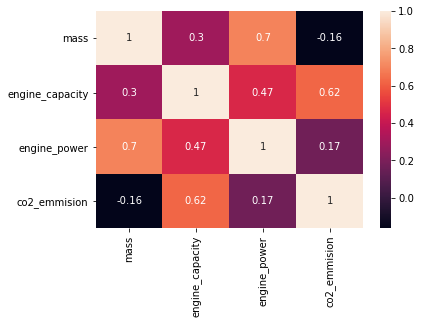

In [33]:
sns.heatmap(relevant_data.corr(), annot = True)
plt.show()

**Trying to explore the data deeper**

Understanding the columns 

In [34]:

relevant_data.make.unique()

array(['CITROEN', 'MERCEDES-BENZ', 'JEEP', 'HYUNDAI', 'MERCEDES BENZ',
       'JAGUAR', 'VOLKSWAGEN, VW', 'RENAULT', 'TOYOTA', 'BMW',
       'VOLKSWAGEN', 'OPEL', 'SUZUKI', 'AUDI', 'KIA', 'SEAT', 'FORD',
       'VOLKSWAGEN VW', 'NISSAN', 'FIAT', 'PEUGEOT', 'MAZDA', 'TESLA',
       'SKODA', 'HONDA', 'ŠKODA', 'LAND ROVER', 'ALFA ROMEO', 'DACIA',
       'Mazda', 'VOLVO', 'LEXUS', 'MITSUBISHI', 'SMART', 'DS', 'BMW I',
       'MG', 'PORSCHE', 'VOLKSWAGEN  VW', 'Tesla', 'Hyundai', 'CUPRA',
       'POLESTAR', 'VOLKSWAGEN,VW', 'MINI', 'Opel / Vauxhall',
       'Mercedes-Benz', 'MERCEDES', 'Skoda', 'Volkswagen', 'B M W',
       'LANCIA', 'LYNK&CO', 'Audi', 'Mini', 'Land Rover', 'Opel',
       'SSANGYONG', 'Kia', 'MERCEDES - BENZ', 'FORD-CNG-TECHNIK', 'NIO',
       'Honda', 'MG, ROEWE', 'SUBARU', 'Seat', 'BYD', 'MASERATI',
       'FORD - CNG-TECHNIK', 'Jaguar', 'FORD-CNG TECHNIK', 'VW', 'DR',
       'MAXUS', 'DFSK', 'FERRARI', 'ALPINE', 'FORD (D)',
       'HYUNDAI, GENESIS', 'VOLKSWAGEN. VW', 'C

In [35]:
relevant_data.make.value_counts()

RENAULT           651
PEUGEOT           645
TOYOTA            636
VOLKSWAGEN, VW    596
BMW               504
                 ... 
XPENG               1
MERCEDES-AMG        1
ALFA  ROMEO         1
Land Rover          1
CHRYSLER            1
Name: make, Length: 91, dtype: int64

In [36]:
top_makes = relevant_data.make.value_counts()[:20]
top_makes

RENAULT           651
PEUGEOT           645
TOYOTA            636
VOLKSWAGEN, VW    596
BMW               504
VOLKSWAGEN        466
SKODA             465
CITROEN           436
MERCEDES-BENZ     436
FORD              420
HYUNDAI           407
AUDI              403
OPEL              400
KIA               387
DACIA             364
FIAT              362
SEAT              300
VOLVO             218
NISSAN            192
SUZUKI            163
Name: make, dtype: int64

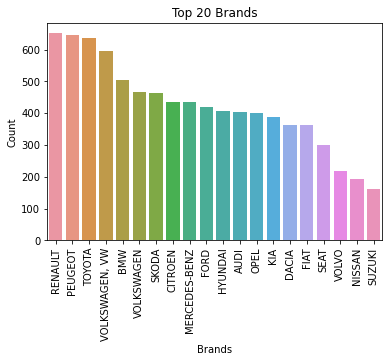

In [37]:
#carrying out some basic visualizations on the dataset 
a = sns.countplot(x = "make", data =relevant_data , order = top_makes.index)

plt.xticks(rotation = 90)
plt.title("Top 20 Brands")
plt.xlabel("Brands")
plt.ylabel("Count")

plt.show()

In [38]:
#Fuel type
relevant_data.fuel_type.value_counts()

PETROL             5505
DIESEL             2243
ELECTRIC            931
PETROL/ELECTRIC     785
LPG                 191
DIESEL/ELECTRIC      58
NG                   54
NG-BIOMETHANE         9
E85                   5
Name: fuel_type, dtype: int64

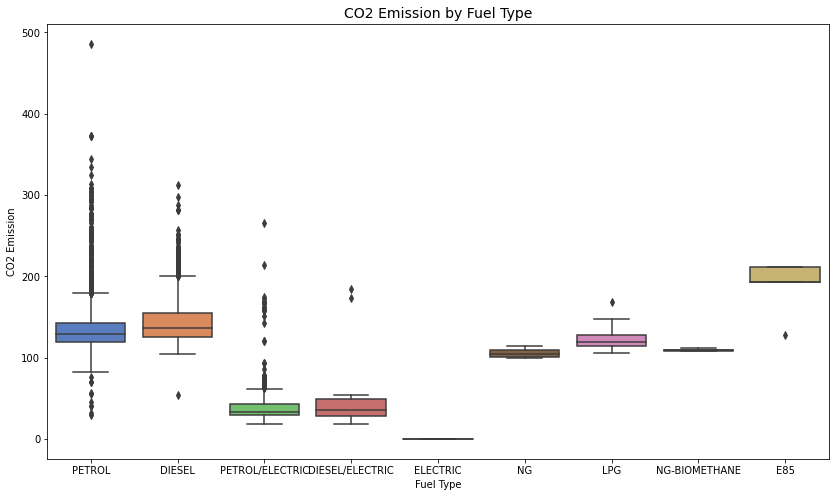

In [40]:
#Below is a plot showing relationship between co2 emmision and fuel type
plt.figure(figsize = (14, 8))
sns.boxplot(x = "fuel_type", y = "co2_emmision", data =relevant_data , palette = "muted")

plt.title("CO2 Emission by Fuel Type", fontsize = 14)
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emission")

plt.show()

<Figure size 1296x576 with 0 Axes>

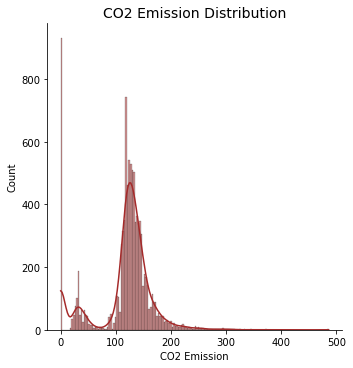

In [43]:
#This belos is to understand the distribution f co2 emmison across the dataset

plt.figure(figsize = (18, 8))

sns.displot(relevant_data.co2_emmision, kde = True, color = "brown")

plt.title("CO2 Emission Distribution", fontsize = 14)
plt.xlabel("CO2 Emission")
plt.ylabel("Count")

plt.show()

In [44]:
#Evaluating the properties of the Engine size
print(sorted(relevant_data.engine_capacity.unique()))

[0.0, 875.0, 898.0, 988.0, 996.0, 998.0, 999.0, 1084.0, 1193.0, 1197.0, 1199.0, 1242.0, 1248.0, 1332.0, 1341.0, 1353.0, 1368.0, 1373.0, 1395.0, 1461.0, 1477.0, 1482.0, 1490.0, 1496.0, 1497.0, 1498.0, 1499.0, 1580.0, 1591.0, 1597.0, 1598.0, 1600.0, 1618.0, 1749.0, 1759.0, 1798.0, 1950.0, 1956.0, 1968.0, 1969.0, 1984.0, 1987.0, 1991.0, 1993.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2143.0, 2151.0, 2191.0, 2199.0, 2261.0, 2360.0, 2480.0, 2487.0, 2488.0, 2494.0, 2498.0, 2755.0, 2891.0, 2894.0, 2925.0, 2956.0, 2967.0, 2979.0, 2981.0, 2987.0, 2993.0, 2995.0, 2996.0, 2997.0, 2998.0, 2999.0, 3456.0, 3605.0, 3745.0, 3902.0, 3982.0, 3995.0, 3996.0, 4395.0, 4999.0, 5000.0, 5038.0, 5980.0, 6162.0, 6498.0]


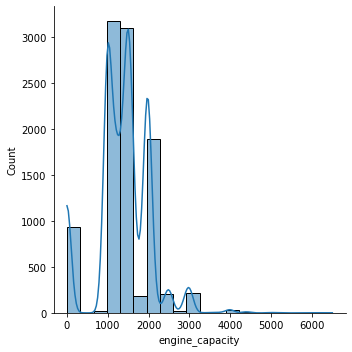

In [45]:
sns.displot(data = relevant_data, x = "engine_capacity", kde = True, bins = 20);

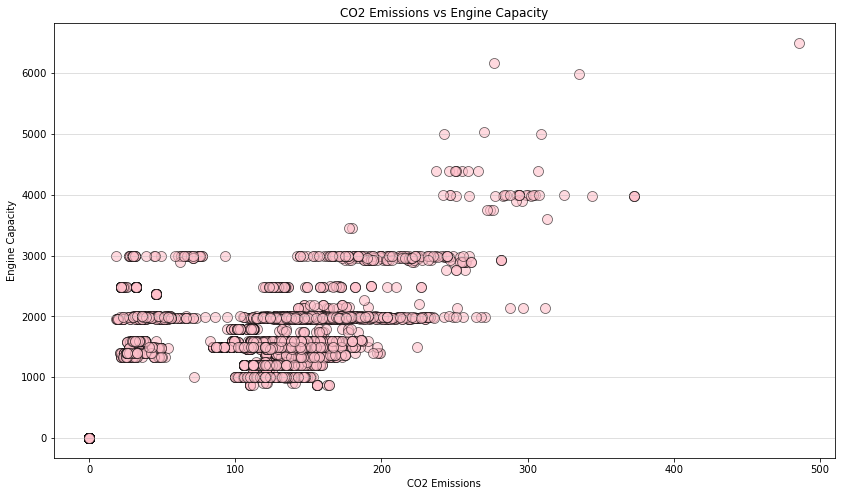

In [49]:
#Below is the plot of Co2 emmision against engine capacity
plt.figure(figsize=(14,8))
sns.scatterplot(data = relevant_data, x = "co2_emmision", y = "engine_capacity", alpha = 0.6, color = "pink" , edgecolor = "k", s = 100)
plt.xlabel("CO2 Emissions")
plt.ylabel("Engine Capacity")
plt.title("CO2 Emissions vs Engine Capacity")
plt.grid(axis = "y", alpha = 0.5)
plt.show()

In [50]:
#Engine size
print(sorted(relevant_data.engine_power.unique()))

[10.0, 18.0, 19.0, 20.0, 26.0, 28.0, 29.0, 31.0, 40.0, 41.0, 42.0, 43.0, 44.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 57.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 102.0, 103.0, 105.0, 106.0, 107.0, 109.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 124.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 139.0, 140.0, 141.0, 142.0, 143.0, 145.0, 146.0, 147.0, 148.0, 150.0, 152.0, 153.0, 154.0, 155.0, 158.0, 160.0, 161.0, 164.0, 165.0, 168.0, 170.0, 172.0, 173.0, 174.0, 176.0, 177.0, 178.0, 180.0, 183.0, 184.0, 185.0, 186.0, 190.0, 192.0, 193.0, 195.0, 200.0, 202.0, 206.0, 208.0, 210.0, 214.0, 215.0, 219.0, 220.0, 221.0, 223.0, 225.0, 226.0, 228.0, 230.0, 233.0, 235.0, 239.0, 240.0, 243.0, 245.0, 250.0, 251.0, 253.0, 2

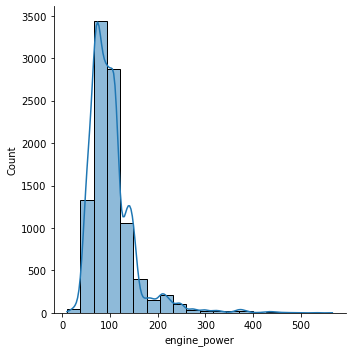

In [51]:
sns.displot(data = relevant_data, x = "engine_power", kde = True, bins = 20);

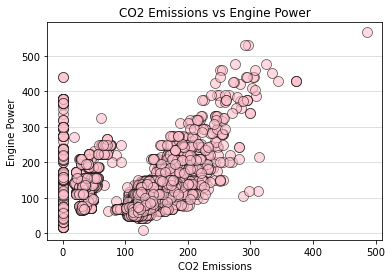

In [52]:
#Plot of CO2 emmisons against engine power
sns.scatterplot(data = relevant_data, x = "co2_emmision", y = "engine_power", alpha = 0.6, color = "pink" , edgecolor = "k", s = 100)
plt.xlabel("CO2 Emissions")
plt.ylabel("Engine Power")
plt.title("CO2 Emissions vs Engine Power")
plt.grid(axis = "y", alpha = 0.5)
plt.show()

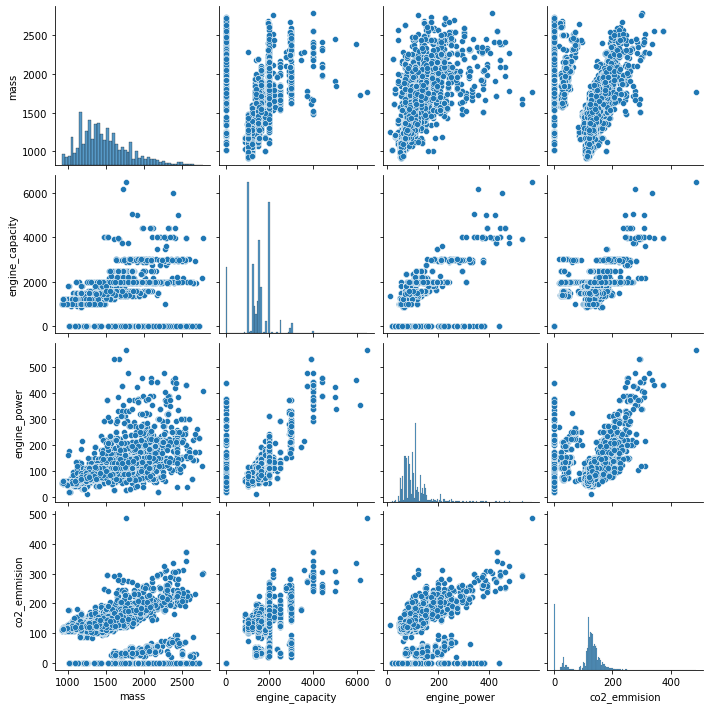

In [53]:
#overview of all features 
sns.pairplot(relevant_data)
plt.show()


5. Regression model selection which will involve selecting the best model for the dataset.


In [55]:
#Need to have an overview of the data to ensure they are all of same datatype 
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9781 entries, 7508241 to 415865
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             9781 non-null   object 
 1   mass             9781 non-null   float64
 2   fuel_type        9781 non-null   object 
 3   engine_capacity  9781 non-null   float64
 4   engine_power     9781 non-null   float64
 5   co2_emmision     9781 non-null   float64
dtypes: float64(4), object(2)
memory usage: 792.9+ KB


In [56]:
#First there is need to convert make and fuel_type to integers
#Encoding my categorical variables 
relevant_data = pd.get_dummies(relevant_data, columns=['make', 'fuel_type'])
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9781 entries, 7508241 to 415865
Columns: 104 entries, mass to fuel_type_PETROL/ELECTRIC
dtypes: float64(4), uint8(100)
memory usage: 1.6 MB


**Feature Scaling**

In [57]:

#This is beacuse i iwll be testing various models including KNN 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
relevant_data[['mass', 'engine_capacity', 'engine_power']] = scaler.fit_transform(relevant_data[['mass', 'engine_capacity', 'engine_power']])


In [58]:
#Feature selection and splitting of data

X = relevant_data.drop('co2_emmision', axis=1)
y = relevant_data['co2_emmision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Model training and evaluations of trained data by calculating the MSE and R-
  squared value.

In [59]:
#applying different models to evaluate which works best 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

results = pd.DataFrame(columns=["Model", "MSE", "R-squared"])

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results = results.append({"Model": model_name, "MSE": mse, "R-squared": r2}, ignore_index=True)

# Format the results
results['MSE'] = results['MSE'].apply(lambda x: "{:.2f}".format(x))
results['R-squared'] = results['R-squared'].apply(lambda x: "{:.2f}".format(x))

results

,Model,MSE,R-squared
0,Linear Regression,191261671208313352617984.00,-67940449947016765440.00
1,Decision Tree,129.89,0.95
2,Random Forest,100.98,0.96
3,Gradient Boosting,173.21,0.94
4,K-Nearest Neighbors,114.41,0.96
